# Text Message Analysis

This Project is about a dataset comprising of short messages. It is suppossed to be analysed using all kinds of techniques. Sentiment Analysisi is supposed to be done, thats gonna be fun :)

In [170]:
# Import messages
import pandas as pd
import matplotlib.pyplot as plt
import snakecase
from Preprocessing import preprocess_text

In [123]:
# read dataset into dataframe

df = pd.read_csv("data\clean_nus_sms.csv")

In [124]:
# Display Dataframe: Data Inspection and Central Tendencies

df.head(10)

,Unnamed: 0,id,Message,length,country,Date
0,0,10120,Bugis oso near wat...,21,SG,2003/4
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,4,10124,Meet after lunch la...,22,SG,2003/4
5,5,10125,m walking in citylink now ü faster come down.....,65,SG,2003/4
6,6,10126,5 nights...We nt staying at port step liao...T...,51,SG,2003/4
7,7,10127,Hey pple...$700 or $900 for 5 nights...Excelle...,81,SG,2003/4
8,8,10128,Yun ah.the ubi one say if ü wan call by tomorr...,160,SG,2003/4
9,9,10129,Hey tmr maybe can meet you at yck,33,SG,2003/4


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48598 entries, 0 to 48597
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48598 non-null  int64 
 1   id          48598 non-null  int64 
 2   Message     48595 non-null  object
 3   length      48598 non-null  object
 4   country     48598 non-null  object
 5   Date        48598 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.2+ MB


In [126]:
#Converting datatypes in columns

df.columns = [col.lower() for col in df.columns]

df["message"] = df["message"].astype(str)
df["country"] = df["country"].astype(str)
df["date"] = pd.to_datetime(df["date"], format = "%Y/%m")

In [127]:
df['length'] = df['length'].apply(pd.to_numeric, errors='coerce')
#df["length"] = df["length"].astype(int) wouldnt work because there are wierd entries in this feature like Error messages

In [128]:
df.describe()

,unnamed: 0,id,length,date
count,48598.000000,48598.000000,48594.000000,48598
mean,27138.722355,21106.315342,54.850434,2009-12-05 04:49:04.713774080
min,0.000000,1.000000,1.000000,2003-04-01 00:00:00
25%,12852.250000,12100.000000,21.000000,2011-01-01 00:00:00
50%,26916.500000,18553.000000,39.000000,2011-03-01 00:00:00
75%,40080.500000,29964.500000,70.000000,2011-11-01 00:00:00
max,55834.000000,45718.000000,910.000000,2015-03-01 00:00:00
std,16206.056352,12189.313543,53.203030,NaN


## Exploratory Data Analysis (EDA): <br> 

Involves various techniques to better understand the characteristics of the dataset.

* Message Length vs. Country: Create a box plot or violin plot showing the distribution of message lengths for each country. This can help you identify whether message lengths vary significantly across different countries.

+ Message Length over Time: Plot a line chart showing how the average or median message length changes over time. This can help you identify any trends or patterns in the length of messages being sent.

+ Word Clouds: Generate word clouds for messages in different countries. Word clouds visually represent the most frequent words in a corpus, providing an intuitive way to see the prominent terms used in each country's messages.

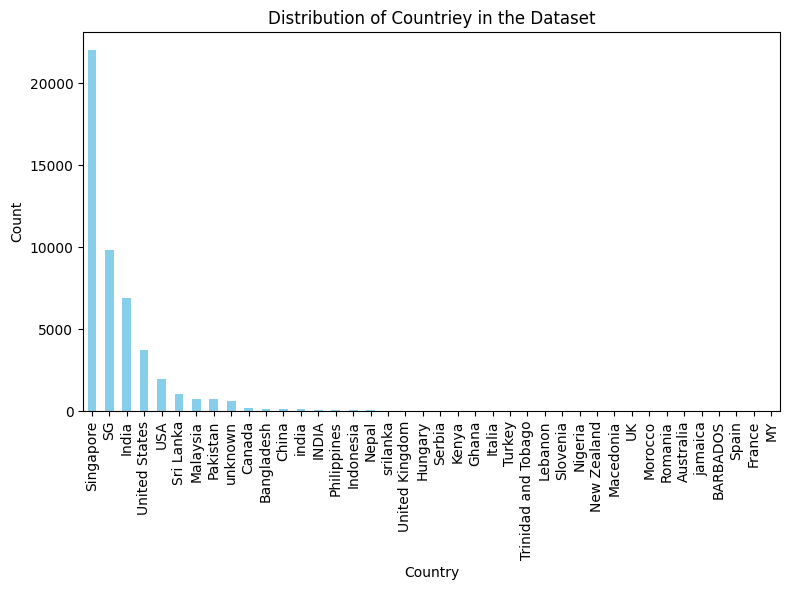

In [129]:
# Distribution of Countries in a Box Plot
country_counts = df['country'].value_counts() 

#Ploting

plt.figure(figsize = (8,6))
country_counts.plot(kind = "bar", color = "skyblue")
plt.title("Distribution of Countriey in the Dataset")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

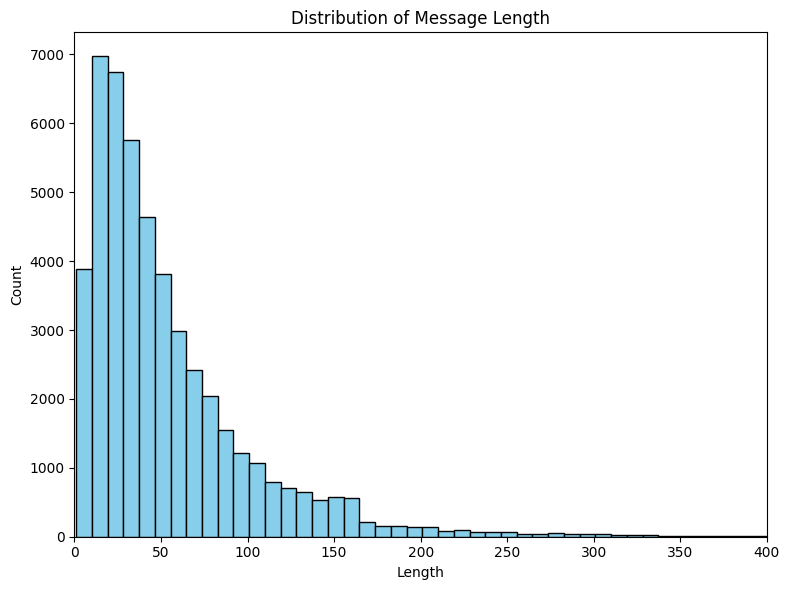

In [130]:
#Message Length Distribution

plt.figure(figsize=(8, 6))
plt.hist(df['length'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Message Length')
plt.xlabel('Length')
plt.ylabel('Count')

# Set x-axis limits
plt.xlim(0, 400)  # Adjust the upper limit (12 in this case)

# Set tick distance on the x-axis
#plt.xticks(range(0, 400, 50))

plt.tight_layout()
plt.show()

So, most messages are between ten and twenty tokens long. The average message has 54 tokens, the median message 39 tokens.

In [148]:
df10 = df[(df['date'] >= '2010-01-01') & (df['date'] <= '2010-12-31')]
df11 = df[(df['date'] >= '2011-01-01') & (df['date'] <= '2011-12-31')]
df12 = df[(df['date'] >= '2012-01-01') & (df['date'] <= '2012-12-31')]
df13 = df[(df['date'] >= '2013-01-01') & (df['date'] <= '2013-12-31')]
df14 = df[(df['date'] >= '2014-01-01') & (df['date'] <= '2014-12-31')]
df15 = df[(df['date'] >= '2015-01-01') & (df['date'] <= '2015-12-31')]

In [149]:
# Group by date and calculate average length
length_by_date10 = df10.groupby('date')['length'].mean()

# Group by date and calculate average length
length_by_date11 = df11.groupby('date')['length'].mean()

# Group by date and calculate average length
length_by_date12 = df12.groupby('date')['length'].mean()

# Group by date and calculate average length
length_by_date13 = df13.groupby('date')['length'].mean()

# Group by date and calculate average length
length_by_date14 = df14.groupby('date')['length'].mean()

# Group by date and calculate average length
length_by_date15 = df15.groupby('date')['length'].mean()


In [158]:
print(length_by_date13)

date
2013-05-01    44.363636
Name: length, dtype: float64


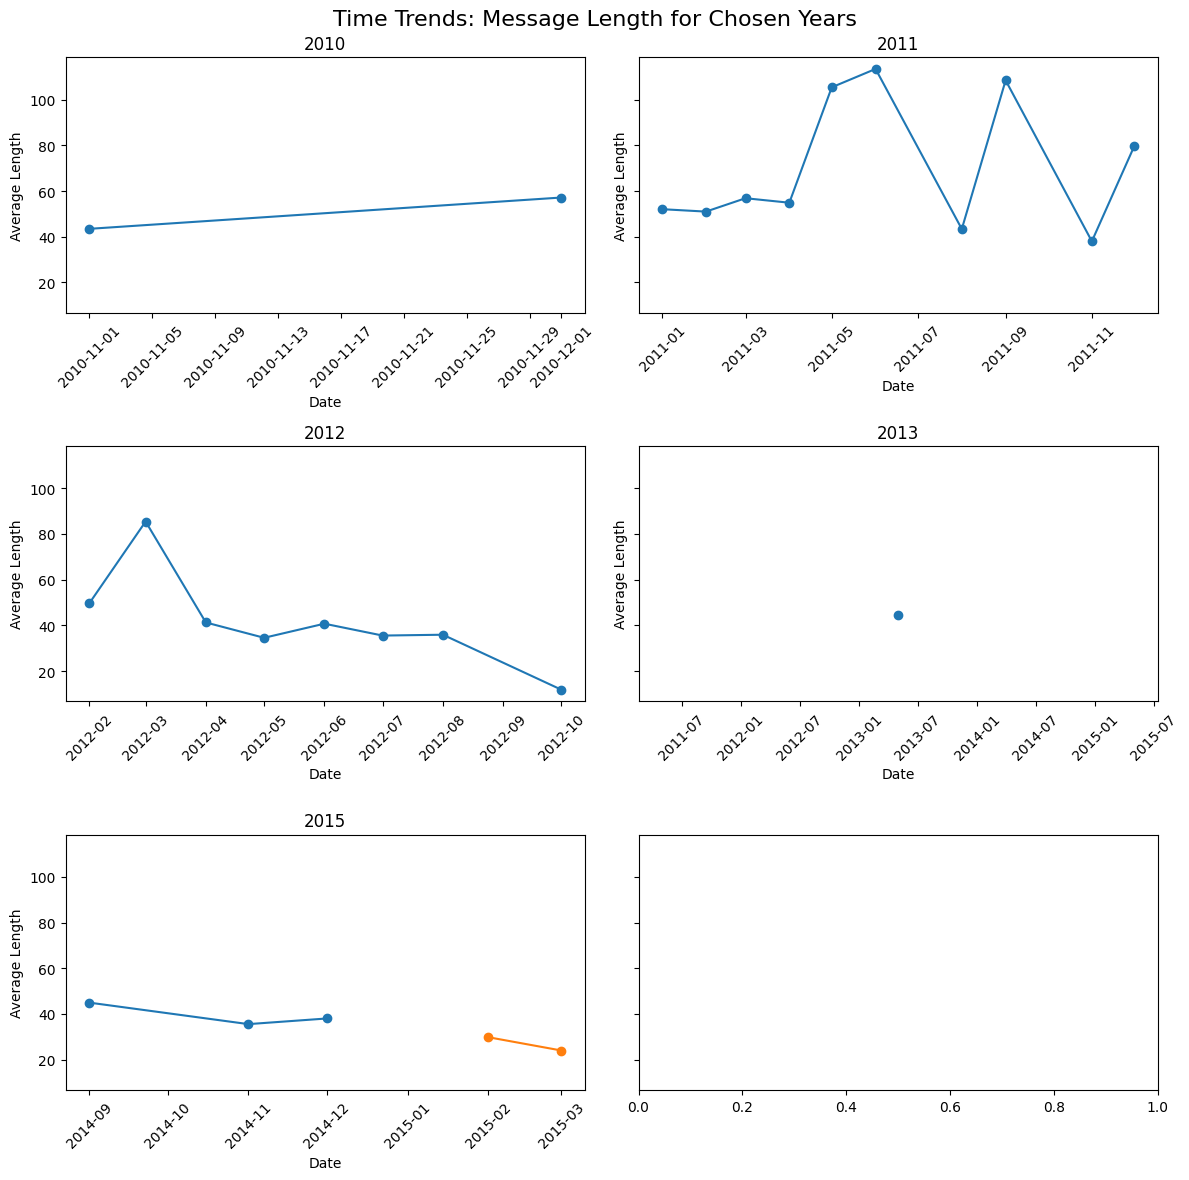

In [154]:

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12), sharey = True)
fig.suptitle('Time Trends: Message Length for Chosen Years', fontsize=16)

# Plot for 2010
axes[0, 0].plot(length_by_date10.index, length_by_date10.values, marker='o')
axes[0, 0].set_title('2010')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Average Length')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot for 2011
axes[0, 1].plot(length_by_date11.index, length_by_date11.values, marker='o')
axes[0, 1].set_title('2011')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Average Length')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot for 2012
axes[1, 0].plot(length_by_date12.index, length_by_date12.values, marker='o')
axes[1, 0].set_title('2012')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Average Length')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot for 2013
axes[1, 1].plot(length_by_date13.index, length_by_date13.values, marker='o')
axes[1, 1].set_title('2013')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Average Length')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot for 2014
axes[2, 0].plot(length_by_date14.index, length_by_date14.values, marker='o')
axes[2, 0].set_title('2014')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Average Length')
axes[2, 0].tick_params(axis='x', rotation=45)

# Plot for 2015
axes[2, 0].plot(length_by_date15.index, length_by_date15.values, marker='o')
axes[2, 0].set_title('2015')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Average Length')
axes[2, 0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Medium Analysis

In this section I want to dive deeper into the dataset and employ more sophisticated analysis like

Word Frequency Analysis: Perform a word frequency analysis to identify the most common words in the messages. This can give you insights into the language used in the dataset.

Sentiment Analysis: Use a sentiment analysis tool or library to analyze the sentiment of the messages. This could help you understand the overall sentiment of the messages in different countries or over time.

Country-specific Analysis: Compare the distribution of message lengths or sentiment scores across different countries to identify any variations in communication style or sentiment.

In [171]:
# Apply preprocessing to "Message" column and create "message_processed" column
df['message_processed'] = df['message'].apply(preprocess_text)

c:\Users\Rene\Documents\Datascience\Codecademy\projects\Portfolio Projects\Text_Message_Analysis\Preprocessing.py:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [173]:
df.head()

,unnamed: 0,id,message,length,country,date,message_processed
0,0,10120,Bugis oso near wat...,21.0,SG,2003-04-01,"[bugis, oso, near, wat]"
1,1,10121,"Go until jurong point, crazy.. Available only ...",111.0,SG,2003-04-01,"[go, jurong, point, crazy, available, bugis, n..."
2,2,10122,I dunno until when... Lets go learn pilates...,46.0,SG,2003-04-01,"[dunno, let, go, learn, pilate]"
3,3,10123,Den only weekdays got special price... Haiz......,140.0,SG,2003-04-01,"[den, weekday, got, special, price, haiz, cant..."
4,4,10124,Meet after lunch la...,22.0,SG,2003-04-01,"[meet, lunch, la]"


In [175]:
from textblob import TextBlob

# Apply sentiment analysis to the original "Message" column
df['sentiment_original'] = df['message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Apply sentiment analysis to the preprocessed "message_processed" column
df['sentiment_processed'] = df['message_processed'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)


       unnamed: 0     id                                            message  \
0               0  10120                              Bugis oso near wat...   
1               1  10121  Go until jurong point, crazy.. Available only ...   
2               2  10122     I dunno until when... Lets go learn pilates...   
3               3  10123  Den only weekdays got special price... Haiz......   
4               4  10124                             Meet after lunch la...   
...           ...    ...                                                ...   
48593       55828  45712                              Come to me AFTER NOON   
48594       55830  45714                                     I LOVE YOU TOO   
48595       55831  45715                                               C-YA   
48596       55833  45717                                        BE MY GUEST   
48597       55834  45718                              MANY MANY MANY PEOPLE   

       length country       date  \
0        21.0  

In [176]:
# Display the DataFrame with sentiment analysis results
df.head(10)

,unnamed: 0,id,message,length,country,date,message_processed,sentiment_original,sentiment_processed
0,0,10120,Bugis oso near wat...,21.0,SG,2003-04-01,"[bugis, oso, near, wat]",0.100000,0.100000
1,1,10121,"Go until jurong point, crazy.. Available only ...",111.0,SG,2003-04-01,"[go, jurong, point, crazy, available, bugis, n...",0.150000,0.200000
2,2,10122,I dunno until when... Lets go learn pilates...,46.0,SG,2003-04-01,"[dunno, let, go, learn, pilate]",0.000000,0.000000
3,3,10123,Den only weekdays got special price... Haiz......,140.0,SG,2003-04-01,"[den, weekday, got, special, price, haiz, cant...",0.178571,0.357143
4,4,10124,Meet after lunch la...,22.0,SG,2003-04-01,"[meet, lunch, la]",0.000000,0.000000
5,5,10125,m walking in citylink now ü faster come down.....,65.0,SG,2003-04-01,"[walking, citylink, faster, come, hungry]",0.022222,0.000000
6,6,10126,5 nights...We nt staying at port step liao...T...,51.0,SG,2003-04-01,"[nightswe, nt, staying, port, step, liaotoo, ex]",0.000000,0.000000
7,7,10127,Hey pple...$700 or $900 for 5 nights...Excelle...,81.0,SG,2003-04-01,"[hey, pple, nightsexcellent, location, wif, br...",0.000000,0.000000
8,8,10128,Yun ah.the ubi one say if ü wan call by tomorr...,160.0,SG,2003-04-01,"[yun, ahthe, ubi, one, say, wan, call, tomorro...",-0.100000,-0.200000
9,9,10129,Hey tmr maybe can meet you at yck,33.0,SG,2003-04-01,"[hey, tmr, maybe, meet, yck]",0.000000,0.000000


In [181]:
# Calculate average sentiment of original messages
average_sentiment_original = df['sentiment_original'].mean()
print(average_sentiment_original)


0.12227756121872416


The sentiment value is typically in the range of -1 to +1, where -1 represents a highly negative sentiment, +1 represents a highly positive sentiment, and 0 represents a neutral sentiment. The mean sentiment value calculated for 

this dataset of 0.122 is to be interpreted as predominantly neutral with a mild shift towards positive sentiment.

In [183]:
# Calculate average sentiment of processsed messages
average_sentiment_processed = df['sentiment_processed'].mean()
print(average_sentiment_processed)

0.10393517839579422


To illustrate the effect of text preprocessing, the average sentiment values of original and processed text data was calculated. The average sentiment for processed text data came out to be 0.104, and therefor similar in polarity and magnitude but smaller than the original sentiment. This illustrates that removing punctualtion for sentiment analysis amplifies the trend toward a neutral sentiment

In [180]:
# Calculate relative difference
df['relative_difference'] = (df['sentiment_original'] - df['sentiment_processed']).abs()

# Calculate average relative difference
average_relative_difference = df['relative_difference'].mean()

print(average_relative_difference)

0.05071168801392786


# Advanced Analysis: <br>
Topic Modeling: Apply topic modeling techniques (such as Latent Dirichlet Allocation or Non-Negative Matrix Factorization) to uncover underlying topics in the messages. This can help you categorize messages based on their content.

Named Entity Recognition (NER): Implement NER to extract entities like names, dates, locations, etc., from the messages. This can provide insights into the main subjects or events mentioned in the dataset.

Time Series Analysis: Perform time series analysis to identify seasonal patterns, trends, and anomalies in the message data over time.

Remember, the choice of analysis depends on your research questions, goals, and the insights you want to extract from the data. It's a good practice to start with basic analyses to gain a foundational understanding before moving on to more complex techniques. Additionally, visualization plays a crucial role in presenting your findings effectively. Utilize plots, charts, and graphs to convey your insights visually.